In [20]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
in_file_name = 'data/grouped_paces_ju.tsv'
df_all = pd.read_csv(in_file_name, delimiter="\t")

In [46]:
df = df_all[np.isfinite(df_all.pace_1)]
#df = df_all
with_history = df_all[np.isfinite(df_all.pace_3)]

In [47]:
paces = df.as_matrix(["pace_2", "pace_3", "pace_4", "pace_5", "pace_6"])
logs = np.log(paces)
means = np.nanmean(logs, axis=1)
stdevs = np.nanstd(logs, axis=1)
df = df.assign(log_means=pd.Series(means).values)
df = df.assign(log_stdevs=pd.Series(stdevs).values)

/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [48]:
# Estimate values for all, but only use them if not other value is available
with_history = df[np.isfinite(df_all.pace_3)]
x = with_history.as_matrix(["mean_team_id"])
x = x.reshape(len(x), 1)

log_means = with_history.log_means.values.reshape(len(with_history.log_means), 1)
log_means_model = linear_model.LinearRegression()
log_means_model.fit(x, log_means)
estimated_log_means = log_means_model.predict(df.mean_team_id.values.reshape(len(df.mean_team_id), 1))
df = df.assign(estimated_log_means=estimated_log_means)

log_stdevs = with_history.log_stdevs.values.reshape(len(with_history.log_stdevs), 1)
log_stdevs_model = linear_model.LinearRegression()
log_stdevs_model.fit(x, log_stdevs)
estimated_log_stdevs = log_stdevs_model.predict(df.mean_team_id.values.reshape(len(df.mean_team_id), 1))
df = df.assign(estimated_log_stdevs=estimated_log_stdevs)



/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [53]:
df

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,log_means,log_stdevs,estimated_log_means,estimated_log_stdevs,final_log_stdevs
0,52.7,BROMMA-VÄLLINGBY SOK/JÄRFÄL;IFK GÖTEBORG,max peter bejmer,3,3,6.337,1.050,5.582,5.608,7.822,NaN,NaN,NaN,1.890567,0.166373,1.944796,0.087202,0.166373
1,91.0,IFK GÖTEBORG;MARKBYGDENS OK,johan högstrand,4,4,6.198,0.468,5.591,5.902,6.571,6.728,NaN,NaN,1.854745,0.057003,1.962559,0.087890,0.057003
2,13.2,IFK GÖTEBORG,vetle ruud bråten,4,4,5.750,0.181,5.688,5.636,5.615,6.060,NaN,NaN,1.752109,0.035106,1.926477,0.086493,0.035106
3,33.2,IFK GÖTEBORG,jonas pilblad,5,5,6.083,0.389,5.978,5.772,6.819,5.756,6.089,NaN,1.807365,0.068628,1.935752,0.086852,0.068628
4,17.5,IFK GÖTEBORG;OK KÅRE,fredrik edn,2,2,6.333,0.472,5.861,6.805,NaN,NaN,NaN,NaN,1.917658,0.000000,1.928471,0.086570,0.086570
5,10.5,IFK LIDINGÖ SOK;IFK GÖTEBORG,fredrik bakkman,2,2,5.483,0.028,5.511,5.455,NaN,NaN,NaN,NaN,1.696533,0.000000,1.925225,0.086444,0.086444
6,16.8,IFK GÖTEBORG,eskil kinneberg,4,4,5.623,0.084,5.611,5.494,5.719,5.668,NaN,NaN,1.727429,0.017203,1.928146,0.086558,0.017203
7,21.3,KOOVEE,topi anjala,6,6,6.080,0.516,5.621,6.100,5.977,7.164,5.642,5.974,1.816586,0.080558,1.930233,0.086638,0.080558
8,1.0,KOOVEE,olexander kratov,1,1,5.874,0.000,5.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.920819,0.086274,0.086274
9,6.7,VAAJAKOSKEN TERÄ;KOOVEE,jani lakanen,6,6,6.044,0.456,5.874,5.734,6.208,6.717,5.326,6.403,1.801252,0.082382,1.923462,0.086376,0.082382


In [54]:
# s = sigma and scale = exp(mu).
df['final_log_means'] = np.where(np.isfinite(df["log_means"]) & df["log_means"]>0, df["log_means"], df["estimated_log_means"])
final_log_means = np.exp(df['final_log_means']) 
df['final_log_stdevs'] = np.where(np.isfinite(df["log_stdevs"]) & df["log_stdevs"]>0, df["log_stdevs"], df["estimated_log_stdevs"])
final_log_stdevs = df['final_log_stdevs']

intervals95 = lognorm.interval(0.95, s = final_log_stdevs, scale = final_log_means)
means = lognorm.mean(s = final_log_stdevs, scale = final_log_means)
medians = lognorm.median(s = final_log_stdevs, scale = final_log_means)

In [55]:

df = df.assign(interval95_start = pd.Series( intervals95[0] ).values)
df = df.assign(interval95_end = pd.Series( intervals95[1] ).values)
df = df.assign(p1_in_interval = pd.Series( (df.interval95_start <= df.pace_1) & (df.interval95_end >= df.pace_1) ).values)
df = df.assign(mean_ln = pd.Series(means).values)
df = df.assign(med_ln = pd.Series(medians).values)

In [56]:
df

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,pace_1,pace_2,pace_3,...,log_stdevs,estimated_log_means,estimated_log_stdevs,final_log_stdevs,final_log_means,interval95_start,interval95_end,p1_in_interval,mean_ln,med_ln
0,52.7,BROMMA-VÄLLINGBY SOK/JÄRFÄL;IFK GÖTEBORG,max peter bejmer,3,3,6.337,1.050,5.582,5.608,7.822,...,0.166373,1.944796,0.087202,0.166373,1.890567,4.780198,9.176560,True,6.715426,6.623124
1,91.0,IFK GÖTEBORG;MARKBYGDENS OK,johan högstrand,4,4,6.198,0.468,5.591,5.902,6.571,...,0.057003,1.962559,0.087890,0.057003,1.854745,5.714579,7.145405,False,6.400459,6.390069
2,13.2,IFK GÖTEBORG,vetle ruud bråten,4,4,5.750,0.181,5.688,5.636,5.615,...,0.035106,1.926477,0.086493,0.035106,1.752109,5.383299,6.177514,True,5.770305,5.766750
3,33.2,IFK GÖTEBORG,jonas pilblad,5,5,6.083,0.389,5.978,5.772,6.819,...,0.068628,1.935752,0.086852,0.068628,1.807365,5.327360,6.971798,True,6.108733,6.094365
4,17.5,IFK GÖTEBORG;OK KÅRE,fredrik edn,2,2,6.333,0.472,5.861,6.805,NaN,...,0.000000,1.928471,0.086570,0.086570,1.917658,5.743009,8.063374,True,6.830548,6.805000
5,10.5,IFK LIDINGÖ SOK;IFK GÖTEBORG,fredrik bakkman,2,2,5.483,0.028,5.511,5.455,NaN,...,0.000000,1.925225,0.086444,0.086444,1.696533,4.604825,6.462140,True,5.475420,5.455000
6,16.8,IFK GÖTEBORG,eskil kinneberg,4,4,5.623,0.084,5.611,5.494,5.719,...,0.017203,1.928146,0.086558,0.017203,1.727429,5.439636,5.819101,True,5.627003,5.626170
7,21.3,KOOVEE,topi anjala,6,6,6.080,0.516,5.621,6.100,5.977,...,0.080558,1.930233,0.086638,0.080558,1.816586,5.252450,7.202858,True,6.170816,6.150825
8,1.0,KOOVEE,olexander kratov,1,1,5.874,0.000,5.874,NaN,NaN,...,NaN,1.920819,0.086274,0.086274,1.920819,5.764539,8.084205,True,6.851998,6.826545
9,6.7,VAAJAKOSKEN TERÄ;KOOVEE,jani lakanen,6,6,6.044,0.456,5.874,5.734,6.208,...,0.082382,1.923462,0.086376,0.082382,1.801252,5.154065,7.118654,True,6.077817,6.057227


array([[1.94479618],
       [1.962559  ],
       [1.92647682],
       ...,
       [2.2658719 ],
       [1.97763189],
       [2.15549197]])

In [57]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
mean_err = rmse(df.mean_ln, df.pace_1)
med_err = rmse(df.med_ln, df.pace_1)
(mean_err, med_err)

(2.541390016173329, 2.530145367308234)

In [58]:
np.mean(df.p1_in_interval)

0.7010934662493721

In [12]:
runner = df[df['name'].str.contains("freeman")==True]

In [13]:
runner.log_stdevs

3372    0.104116
Name: log_stdevs, dtype: float64

In [15]:
x = np.linspace(5, 13, 100)
y = lognorm.pdf(x, s= runner.log_stdevs, scale=np.exp(runner.log_means))

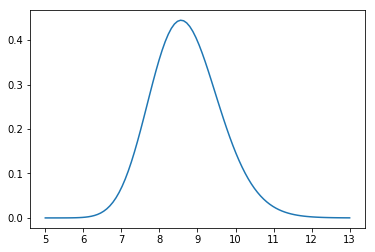

In [16]:
plt.plot(x, y)

In [18]:
with_history

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,log_means,log_stdevs,interval95_start,interval95_end,p1_in_interval,mean_ln,med_ln
0,52.7,BROMMA-VÄLLINGBY SOK/JÄRFÄL;IFK GÖTEBORG,max peter bejmer,3,3,6.337,1.050,5.582,5.608,7.822,NaN,NaN,NaN,1.890567,0.166373,4.780198,9.176560,True,6.715426,6.623124
1,91.0,IFK GÖTEBORG;MARKBYGDENS OK,johan högstrand,4,4,6.198,0.468,5.591,5.902,6.571,6.728,NaN,NaN,1.854745,0.057003,5.714579,7.145405,False,6.400459,6.390069
2,13.2,IFK GÖTEBORG,vetle ruud bråten,4,4,5.750,0.181,5.688,5.636,5.615,6.060,NaN,NaN,1.752109,0.035106,5.383299,6.177514,True,5.770305,5.766750
3,33.2,IFK GÖTEBORG,jonas pilblad,5,5,6.083,0.389,5.978,5.772,6.819,5.756,6.089,NaN,1.807365,0.068628,5.327360,6.971798,True,6.108733,6.094365
6,16.8,IFK GÖTEBORG,eskil kinneberg,4,4,5.623,0.084,5.611,5.494,5.719,5.668,NaN,NaN,1.727429,0.017203,5.439636,5.819101,True,5.627003,5.626170
7,21.3,KOOVEE,topi anjala,6,6,6.080,0.516,5.621,6.100,5.977,7.164,5.642,5.974,1.816586,0.080558,5.252450,7.202858,True,6.170816,6.150825
9,6.7,VAAJAKOSKEN TERÄ;KOOVEE,jani lakanen,6,6,6.044,0.456,5.874,5.734,6.208,6.717,5.326,6.403,1.801252,0.082382,5.154065,7.118654,True,6.077817,6.057227
10,5.3,KOOVEE;HIIDENKIERTÄJÄT;DELTA,lauri sild,6,6,5.950,0.410,5.851,5.996,5.829,6.765,5.391,5.866,1.783921,0.073342,5.156063,6.873465,True,5.969185,5.953152
11,49.8,KANGASALA SK;KOOVEE,kenny kivikas,6,4,6.019,0.337,5.662,5.837,6.014,6.562,NaN,NaN,1.813201,0.049671,5.561391,6.756828,True,6.137604,6.130037
12,5.3,KOOVEE;HIIDENKIERTÄJÄT;DELTA,timo sild,6,6,5.648,0.359,5.272,5.850,5.378,6.293,5.346,5.748,1.742679,0.060014,5.078694,6.425694,True,5.722926,5.712629


### 